# Baseball Data: a thorough analysis 
#### A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. 

#### the data is available at: http://www.seanlahman.com/baseball-archive/statistics/

### Focus of our analysis
#### Our analysis will focus on players salaries:
- What is the salary evolution between 1871 and 2014?
- Were different teams awarded different salaries?
    - were the difference justified?
- Did awarded players earn more on average?
- What was the influence of appearances on salary?
- Did the college attended influence salary of players?
- Were the players with the best statistics awarded the with the best salaries?

### Packages needed

In [1]:
# Import General Packages
import numpy as np
import pandas as pd

# Import plotting/graphics packages
import matplotlib.pyplot as plt
import seaborn as sns 

# Graphics inline 
%matplotlib inline

### Importing the datasets of interest 

Main tables:
- MASTER - Player names, DOB, and biographical info
- Batting - batting statistics
- Pitching - pitching statistics
- Fielding - fielding statistics


Supplemented by theses tables 
- Teams - yearly stats and standings 
- Salaries - player salary data
- AwardsPlayers - awards won by players
- AwardsSharePlayers - award voting for player awards
- Appearances - details on the positions a player appeared at
- Schools - list of colleges that players attended
- CollegePlaying - list of players and the colleges they attended

In [2]:
master = pd.read_csv('baseballdatabank-2017.1/core/Master.csv')
batting = pd.read_csv('baseballdatabank-2017.1/core/Batting.csv')
pitching = pd.read_csv('baseballdatabank-2017.1/core/Pitching.csv')
fielding = pd.read_csv('baseballdatabank-2017.1/core/Fielding.csv')
teams = pd.read_csv('baseballdatabank-2017.1/core/Teams.csv')
salaries = pd.read_csv('baseballdatabank-2017.1/core/Salaries.csv')
awardPlayers = pd.read_csv('baseballdatabank-2017.1/core/AwardsPlayers.csv')
awardsSharePlayers = pd.read_csv('baseballdatabank-2017.1/core/AwardsSharePlayers.csv')
appearances = pd.read_csv('baseballdatabank-2017.1/core/Appearances.csv')
schools = pd.read_csv('baseballdatabank-2017.1/core/Schools.csv')
collegePlaying = pd.read_csv('baseballdatabank-2017.1/core/CollegePlaying.csv')

# Salary

In [11]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [12]:
salaries.lgID.unique()

array(['NL', 'AL'], dtype=object)

In [17]:
mean_salary_pa = salaries.groupby(['yearID']).mean()['salary']
median_salary_pa = salaries.groupby(['yearID']).median()['salary']
max_salary_pa = salaries.groupby(['yearID']).max()['salary']

In [83]:
top_quartile_pa = salaries[salaries['salary']>salaries['salary']\
                           .quantile(0.75)].dropna().groupby(['yearID']).mean()['salary']

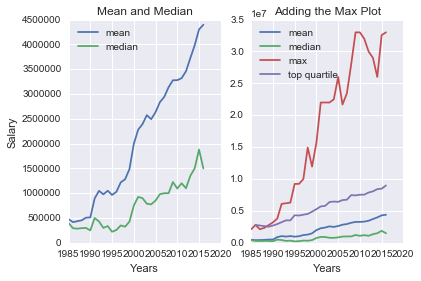

In [47]:
plt.subplot(1, 2, 1)
plt.plot(mean_salary_pa, label='mean')
plt.plot(median_salary_pa, label='median')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Mean and Median')

plt.subplot(1, 2, 2)
plt.plot(mean_salary_pa, label='mean')
plt.plot(median_salary_pa, label='median')
plt.plot(max_salary_pa, label='max')
plt.plot(top_quartile_pa, label='top quartile')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.title('Adding the Max Plot')

#### Histogram of salary

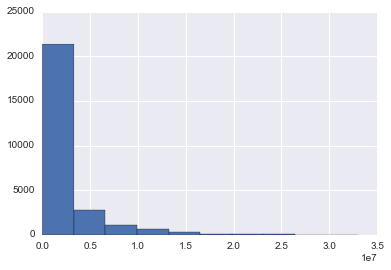

In [67]:
salaries.salary.hist()

#### First let's note that the data for the salaries is spanning from 1985 to 2016, unlike other datasets
- the spread between mean an median increases at a fast rate 
- is the data adjusted to inflation?
    - if not, shall we do it?
- so we want to understand more the difference between average/median and maximum values and as we can see the spread is huge. There are huge inequalities between players, what are the reasons:
    - skills?
    - college?
    - team?
    - but the first step would be to see where this maximum values come from

### Understanding the maximum values 

In [114]:
top_one_pct = salaries[salaries['salary']>salaries['salary'].quantile(0.99)]

In [115]:
top_one_pct.

,yearID,teamID,lgID,playerID,salary
13923,2001,TEX,AL,rodrial01,22000000
14766,2002,TEX,AL,rodrial01,22000000
14782,2002,TOR,AL,delgaca01,19400000
14934,2003,BOS,AL,ramirma02,20000000
15349,2003,NYN,NL,vaughmo01,17166667


In [102]:
teams_top_salaries=[]
teams_no_top_salaries=[]

In [104]:
for team in salaries.teamID.unique():
    if team in top_one_pct.teamID.unique():
        teams_top_salaries.append(team)
    else:
        teams_no_top_salaries.append(team)

In [113]:
print "Teams without top salaries players:",len(teams_no_top_salaries)
print "Teams with top salaries players:", len(teams_top_salaries)

Teams without top salaries players: 28
Teams with top salaries players: 64
